## Reference
* [Convnet autoencoder for Cifar10 using Keras](https://github.com/shibuiwilliam/Keras_Autoencoder)
* [Similar images finder](https://github.com/ankonzoid/artificio/tree/master/similar_images_AE)

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train[:1000]
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

print x_train.dtype

Using TensorFlow backend.


(1000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
uint8


In [19]:
x_train_scaled = x_train.astype('float32')
x_train_scaled = x_train_scaled/255
print x_train_scaled.dtype
print x_train_scaled.shape

float32
(1000, 32, 32, 3)


In [32]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras import regularizers

input_img = Input(shape=(32, 32, 3))

x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoder = MaxPooling2D((2, 2), padding='same', name='encoder')(x)

# at this point the representation is (4, 4, 32) i.e. 128-dimensional

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoder)
x = UpSampling2D((2, 2))(x)
#x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoder = Conv2D(3, (3, 3), activation='sigmoid', padding='same',  name='lastL')(x)

autoencoder = Model(inputs=input_img, outputs=decoder)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
train_history = autoencoder.fit(x=x_train_scaled, y=x_train_scaled, batch_size=20, epochs=10, shuffle=True)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6327
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5808
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5715
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5684
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5683
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5649
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5641
Epoch 8/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5626
Epoch 9/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5625
Epoch 10/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5630


In [33]:
decoded_imgs = autoencoder.predict(x_train_scaled)

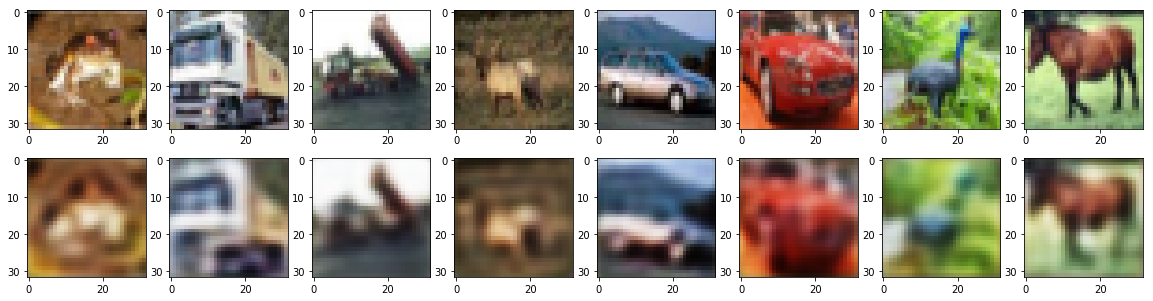

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
n = 8
for i in range(n):    
    plt.subplot(2, n, i + 1)
    img = x_train_scaled[i]
    plt.imshow(img)
    
    plt.subplot(2, n, i + 1 + n)
    img = decoded_imgs[i]
    plt.imshow(img)
plt.show()